In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
 
# Initialising the CNN
classifier = Sequential()
 
# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
 
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
 
# Step 3 - Flattening
classifier.add(Flatten())
 
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
 
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
from keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
training_set = train_datagen.flow_from_directory('cat_dog/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
 
test_set = test_datagen.flow_from_directory('cat_dog/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [30]:
classifier.fit_generator(training_set,
                         steps_per_epoch = (8005/32),
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = (2023/32))

Epoch 1/25
250/250 [==============================] - 172s 688ms/step - loss: 0.6941 - accuracy: 0.5115 - val_loss: 0.6909 - val_accuracy: 0.5245
Epoch 2/25
250/250 [==============================] - 121s 484ms/step - loss: 0.6897 - accuracy: 0.5505 - val_loss: 0.6784 - val_accuracy: 0.5670
Epoch 3/25
250/250 [==============================] - 101s 405ms/step - loss: 0.6752 - accuracy: 0.5696 - val_loss: 0.6657 - val_accuracy: 0.5937
Epoch 4/25
250/250 [==============================] - 25s 101ms/step - loss: 0.6615 - accuracy: 0.6059 - val_loss: 0.6454 - val_accuracy: 0.6258
Epoch 5/25
250/250 [==============================] - 13s 52ms/step - loss: 0.6416 - accuracy: 0.6294 - val_loss: 0.6603 - val_accuracy: 0.6105
Epoch 6/25
250/250 [==============================] - 13s 52ms/step - loss: 0.6360 - accuracy: 0.6353 - val_loss: 0.6267 - val_accuracy: 0.6476
Epoch 7/25
250/250 [==============================] - 13s 52ms/step - loss: 0.6265 - accuracy: 0.6472 - val_loss: 0.6231 - val_ac

In [32]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
 
class_labels = {v: k for k, v in training_set.class_indices.items()}

This is an dogs


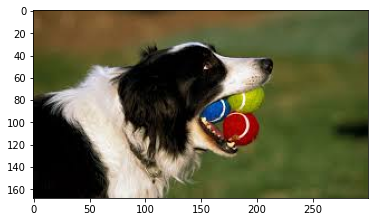

In [41]:
img = imread('test1.jpg') 
plt.imshow(img)
img = resize(img,(64,64)) 
img = np.expand_dims(img,axis=0) 
prediction = classifier.predict_classes(img)
print("This is an {}".format(class_labels[prediction[0][0]]))

This is an cats


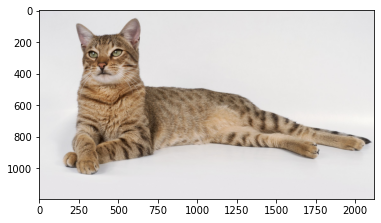

In [42]:
img = imread('test2.jpg') 
plt.imshow(img)
img = resize(img,(64,64)) 
img = np.expand_dims(img,axis=0) 
prediction = classifier.predict_classes(img)
print("This is an {}".format(class_labels[prediction[0][0]]))